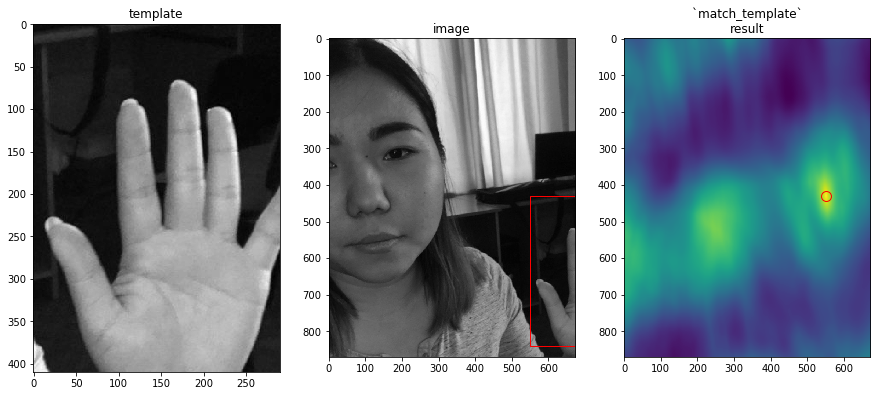

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import data
from skimage.feature import match_template

from skimage import io 

from skimage.data import data_dir
from skimage.morphology import disk

me = io.imread(os.path.join(data_dir, "madiko.jpg"), as_grey=True)
coin = me[430:840,550:840]

result = match_template(me, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.axis()
ax1.set_title('template')

ax2.imshow(me, cmap=plt.cm.gray)
ax2.axis()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.axis()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()